In [ ]:
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K


batch_size = 16
img_width=300
img_height=300

no_of_training_sample = 395
no_of_validation_sample = 100



train_dir = "/content/drive/MyDrive/Desertation_3/agu_data/training"
val_dir = "/content/drive/MyDrive/Desertation_3/agu_data/validation"



if K.image_data_format() == "channels_first":
  input_shape=(3,img_width,img_height)
else:
  input_shape = (img_width,img_height,3)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=15,
                                   vertical_flip=True,
                                   fill_mode='reflect',
                                   data_format='channels_last',
                                   brightness_range=[0.5, 1.5],
                                   featurewise_center=True,
                                   featurewise_std_normalization=True)

test_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir, # this is the target directory
        target_size=(img_width,img_height),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(img_width,img_height),
        batch_size=batch_size,
        class_mode='binary')





Found 392 images belonging to 2 classes.
Found 295 images belonging to 2 classes.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape=input_shape))#32
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3)))#32
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64,(3,3)))#64
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))



model1.add(Flatten())
model1.add(Dense(64))#64
model1.add(Dense(128))

model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))

model1.summary()



model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 298, 298, 32)      896       
_________________________________________________________________
activation_47 (Activation)   (None, 298, 298, 32)      0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 147, 147, 32)      9248      
_________________________________________________________________
activation_48 (Activation)   (None, 147, 147, 32)      0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 71, 71, 64)       

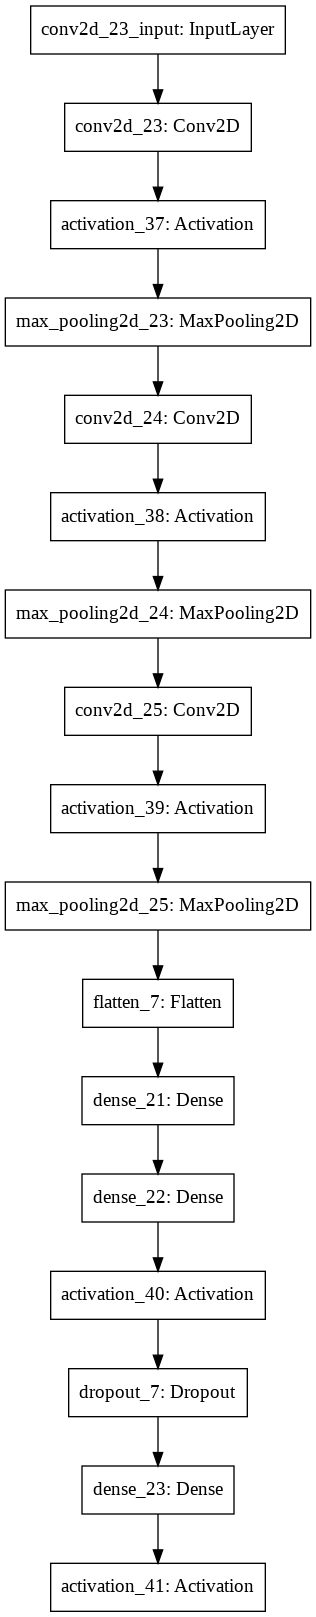

In [ ]:
from keras.utils import plot_model
plot_model(model1, to_file="/content/drive/MyDrive/Desertation_3/MultiClassNeuralNetwork/model.png")

In [ ]:
'''
batch_size = 16
img_width=150
img_height=150

no_of_training_sample = 395
no_of_validation_sample = 100
'''
from keras.callbacks import ModelCheckpoint
from keras.callbacks import History
import tensorflow as tf



# define checkpoint callback
filepath = '/content/drive/MyDrive/Desertation_3/MultiClassNeuralNetwork/models/model/model-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'
#checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

History = History()

my_callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min'),
    #History = tf.keras.callbacks.History()

]





History=model1.fit_generator(train_generator,
                        steps_per_epoch=no_of_training_sample//batch_size,
                        epochs=30,
                        verbose=2, 
                        callbacks=[my_callbacks],
                        validation_data=validation_generator,
                        
                        validation_steps=no_of_validation_sample//batch_size)





/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
24/24 - 30s - loss: 0.6851 - accuracy: 0.5479 - val_loss: 0.5361 - val_accuracy: 0.6146

Epoch 00001: val_loss improved from inf to 0.53608, saving model to /content/drive/MyDrive/Desertation_3/MultiClassNeuralNetwork/models/model/model-ep001-loss0.685-val_loss0.536.h5
Epoch 2/30
24/24 - 28s - loss: 0.6079 - accuracy: 0.6516 - val_loss: 0.5157 - val_accuracy: 0.9375

Epoch 00002: val_loss improved from 0.53608 to 0.51574, saving model to /content/drive/MyDrive/Desertation_3/MultiClassNeuralNetwork/models/model/model-ep002-loss0.608-val_loss0.516.h5
Epoch 3/30
24/24 - 28s - loss: 0.5429 - accuracy: 0.7979 - val_loss: 0.2881 - val_accuracy: 0.9375

Epoch 00003: val_loss improved from 0.51574 to 0.28811, saving model to /content/drive/MyDrive/Desertation_3/MultiClassNeuralNetwork/models/model/model-ep003-loss0.543-val_loss0.288.h5
Epoch 4/30
24/24 - 28s - loss: 0.3933 - accuracy: 0.8883 - val_loss: 0.1512 - val_accuracy: 0.9479

Epoch 00004: val_loss improved from 0.28811 to 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


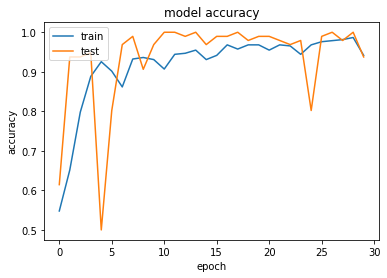

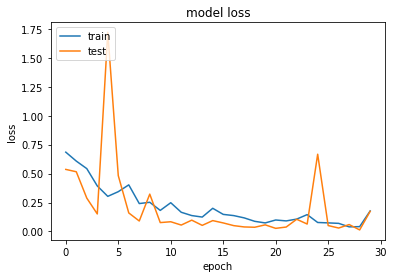

In [ ]:
import matplotlib.pyplot as plt
print(History.history.keys())
# summarize history for accuracy
fig1 = plt.figure()
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig1.savefig('/content/drive/MyDrive/Desertation_3/MultiClassNeuralNetwork/model_Accuracy.png')
# summarize history for loss
fig2 = plt.figure()
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig2.savefig('/content/drive/MyDrive/Desertation_3/MultiClassNeuralNetwork/model_Loss.png')

In [ ]:
from keras.preprocessing import image
import numpy as np
import tensorflow as tf
from keras.models import load_model


# load the model
model = load_model('/content/drive/MyDrive/Desertation_3/MultiClassNeuralNetwork/models/model-ep021-loss0.143-val_loss0.076.h5')

img = image.load_img('/content/drive/MyDrive/Desertation_3/MultiClassNeuralNetwork/all.png',target_size=(300,300))
img = tf.keras.preprocessing.image.array_to_img(img)
img = np.expand_dims(img, axis=0)

reslt = model.predict_proba(img, verbose=0)
print(reslt)
if reslt[0][0] == 1:
  prediction = 'ALL'
else:
  prediction = 'MM'

print(prediction)


[[1.]]
ALL


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
import os
from keras.preprocessing import image
import numpy as np
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator


#orignal microscopy image
#bmp
orignal_all = '/content/drive/MyDrive/Desertation_3/MultiClassNeuralNetwork/Original_data/validation/ALL/'

orignal_mm = '/content/drive/MyDrive/Desertation_3/MultiClassNeuralNetwork/Original_data/validation/MM/'


#----------------------------------

all_dir = '/content/drive/MyDrive/Desertation_3/data/validation/ALL/'
mm_dir  = '/content/drive/MyDrive/Desertation_3/data/validation/MM/'

model = load_model('/content/drive/MyDrive/Desertation_3/MultiClassNeuralNetwork/models/model-ep021-loss0.143-val_loss0.076.h5')

path = all_dir

# 1 = multiple myloma
# 0 = allukemia

ALL_prediction = []
ALL_actual = []

MM_prediction = []
MM_actual = []

for filename in os.listdir(path):
    if filename.endswith(".png"):
      filename = str(filename)
      x = path + filename
      img = image.load_img(x,target_size=(300,300))
      img = tf.keras.preprocessing.image.array_to_img(img)
      img = np.expand_dims(img, axis=0)
      reslt = model.predict(img)
      print(reslt)
      if reslt[0][0] == 1:
        prediction = 1   #'mm'
      else:prediction = 0 #'All'
      print(prediction)
      ALL_prediction.append(prediction) 

      

[[1.]]
1
[[0.]]
0
[[0.]]
0
[[0.]]
0
[[0.]]
0
[[0.]]
0
[[0.]]
0
[[0.]]
0
[[0.]]
0
[[0.]]
0
[[0.]]
0
[[0.]]
0
[[0.]]
0
[[0.]]
0
[[0.]]
0
[[0.]]
0
[[0.]]
0
[[0.]]
0
[[0.]]
0
[[0.]]
0
[[0.]]
0
[[1.]]
1
[[0.]]
0
[[0.]]
0
[[0.]]
0
[[0.]]
0


In [21]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

all_pre= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,0, 0, 0, 0, 0,1,0,0,0,0,0]
actual_all =[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]


mm_pre= [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,1,1,1,1,1,1,1]
actual_mm = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

labels = actual_all + actual_mm
pred = all_pre+mm_pre


# predict probabilities for test set
# predict crisp classes for test set
yhat_classes = all_pre


# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(labels, pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(labels, pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, pred)
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(labels, pred)
print('Cohens kappa: %f' % kappa)
# ROC AUC

# confusion matrix
matrix = confusion_matrix(labels, pred)
print(matrix)
























Accuracy: 0.977273
Precision: 0.958333
Recall: 1.000000
F1 score: 0.978723
Cohens kappa: 0.954357
[[20  1]
 [ 0 23]]


In [22]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np



all_pre= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,0, 0, 0, 0, 0,1,0,0,0,0,0]
actual_all =[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]


mm_pre= [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,1,1,1,1,1,1,1]
actual_mm = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

labels = actual_all + actual_mm
pred = all_pre+mm_pre


cm = confusion_matrix(labels,pred)

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks= np.arange(len(classes))
  plt.xticks(tick_marks,classes, rotation=45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("normalized confusion matrix")
  else:
    print("without normalizted")

  print(cm)

  thresh = cm.max()/2.

  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j], horizontalalignment ='center',color='white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.savefig('/content/drive/MyDrive/Desertation_3/MultiClassNeuralNetwork/confusion_matrix.png')





without normalizted
[[20  1]
 [ 0 23]]


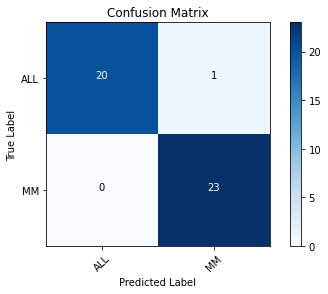

In [23]:
cm_plot_labels = ['ALL','MM']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')
